# Intro

* Loading Data

In [1]:
# Loading libraries

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("products.csv")
print("the dataset has " + str(df.shape[0]) + " observations (ice cream flavors) and " + str(df.shape[1]) + " features " + str([col for col in df.columns]))

# Dataset: https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset

# Inspirations
# Using Ice Cream Ingredients to Predict Rating: https://www.kaggle.com/code/gcdatkin/using-ice-cream-ingredients-to-predict-rating
# Finding the Best Ice Cream: https://www.kaggle.com/code/kelvintran1998/finding-the-best-ice-cream
# EDA ideas: McDonalds Ice Cream Machines Breaking: https://www.kaggle.com/code/aashidutt3/eda-mcdonalds-ice-cream-machines-breaking

the dataset has 241 observations (ice cream flavors) and 8 features ['brand', 'key', 'name', 'subhead', 'description', 'rating', 'rating_count', 'ingredients']


In [3]:
df.head(10)

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
5,bj,5_bj,Peanut Butter Half Baked®,Chocolate & Peanut Butter Ice Creams Mixed wit...,If you were more than a little bit smitten wit...,4.9,14,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
6,bj,6_bj,Berry Sweet Mascarpone,Blackberry & Mascarpone Ice Creams with Shortb...,From the sweet blackberry and crazy creamy mas...,4.6,10,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
7,bj,7_bj,Chocolate Peanut Butter Split,Chocolate & Banana Ice Creams with Mini Peanut...,We’ve loaded our banana and chocolate ice crea...,5.0,7,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
8,bj,8_bj,Justice ReMix'd ™,Cinnamon & Chocolate Ice Creams with Gobs of C...,Now serving Justice ReMix’d: the flavor and ac...,4.3,110,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
9,bj,9_bj,Boots on the Moooo’n™,A Universe of Milk Chocolate Ice Cream with Fu...,While Space Force works to get boots (back) on...,4.7,42,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."


* Data Cleaning: dropping unused columns

In [4]:
# we don't need to use these columns, so we will drop it
df = df.drop(columns=['key','subhead','description'])

* Data Cleaning: transform brand feature to more readable names

In [5]:
# change brand name
df['brand'] = df['brand'].replace(['hd','breyers','bj','talenti'],['HaagenDazs','Breyers','BenJerrys','Talenti'])
df['brand'].value_counts()

HaagenDazs    70
Breyers       69
BenJerrys     57
Talenti       45
Name: brand, dtype: int64

# Exploratory Data Analysis

* Exploratory Data Analysis: Color Scheme

In [6]:
# loading dataviz libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [7]:
sns.set()
%matplotlib inline
rcParams['figure.figsize'] = 12,8
rcParams['figure.titlesize'] = 18
rcParams['font.size'] = 28
sns.set_theme(style="whitegrid")
sns.despine(left=True, bottom=True)

<Figure size 864x576 with 0 Axes>

Notebook Color Scheme: 
Ben Jerry's, Häagen-Dazs, Talenti, Breyers


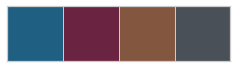

In [8]:
# Color Scheme
class clr:
    S = '\033[1m' + '\033[96m' # chance color text
    E = '\033[0m'
    
my_colors = ['#1F6082', '#6A2340', '#83563f', '#495057']

sns.palplot(sns.color_palette(my_colors))

print(clr.S + "Notebook Color Scheme: " + clr.E)
print(r"Ben Jerry's, Häagen-Dazs, Talenti, Breyers")


In [9]:
# create color reference dict
# the idea is to use this dict to sort the color code in the same way of the plot
# colors = ['#1F6082', '#6A2340', '#83563f', '#171717']

color_reference = {'BenJerrys':'#1F6082', 'Breyers':'#495057', 'HaagenDazs':'#6A2340', 'Talenti':'#83563f'}
color_reference

{'BenJerrys': '#1F6082',
 'Breyers': '#495057',
 'HaagenDazs': '#6A2340',
 'Talenti': '#83563f'}

* Exploratory Data Analysis

In [10]:
# change column names
flavors = df['brand'].value_counts().reset_index().sort_values('brand', ascending=False)
flavors = flavors.rename(columns = {'index':'brand', 'brand':'value_counts'})
flavors

,brand,value_counts
0,HaagenDazs,70
1,Breyers,69
2,BenJerrys,57
3,Talenti,45


Text(0, 0.5, '# Flavors')

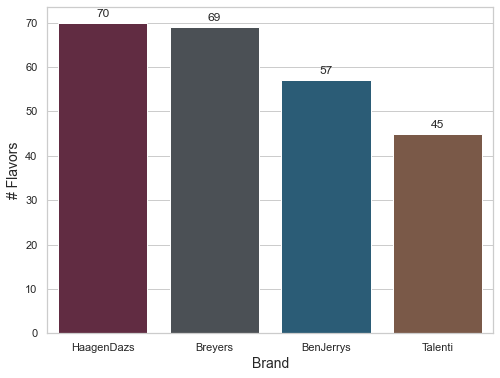

In [11]:
# plot the brands flavors counts

plt.figure(figsize=(8, 6))
colors = flavors['brand'].replace(color_reference) # replace elements in a list using dictionary lookup
colors = colors.tolist() # list of colors for palette parameter in sns plot
splot = sns.barplot(data=flavors, x='brand', y='value_counts', palette=colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('# Flavors', fontsize=14)


* Exploratory Data Analysis: Flavors vs Rating

Text(0, 0.5, 'Flavors')

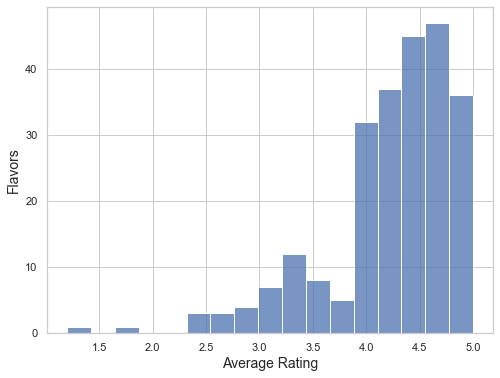

In [12]:
# Flavors x Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating')
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Flavors', fontsize=14)

In [13]:
# normality testing

# skewness
skewness = df['rating'].skew()

if skewness < -1 or skewness > 1:
    print('skewness: {:.1f}. The distribution is highly skewed.'.format(skewness))
elif (skewness > -1 and skewness < -0.5) or  (skewness > 0.5 and skewness < 1):
    print('skewness: {:.1f}. The distribution is moderately skewed.'.format(skewness))
else:
    print('skewness: {:.1f}. The distribution is approximately symmetric'.format(skewness))


kurtosis = df['rating'].kurtosis()

if kurtosis  < 3:
    print('kurtosis: {:.1f}. The distribution is platykurtic (short tails).'.format(kurtosis))
elif kurtosis > 3:
    print('kurtosis: {:.1f}. The distribution is leptokurtic (long tails).'.format(kurtosis))
else:
    print('kurtosis: {:.1f}. The distribution is mesokurtic'.format(kurtosis))



skewness: -1.6. The distribution is highly skewed.
kurtosis: 3.1. The distribution is leptokurtic (long tails).


In [14]:
kurtosis = df['rating'].kurtosis()
kurtosis

3.114583462060015

* Exploratory Data Analysis: Flavors vs # Rating

In [15]:
# Flavors x Rating Distribution
ratings_by_brand = df.groupby('brand')['rating_count'].sum().reset_index().sort_values('brand', ascending=True)
ratings_by_brand

,brand,rating_count
0,BenJerrys,7954
1,Breyers,5009
2,HaagenDazs,4657
3,Talenti,4074


Text(0, 0.5, '# Reviews')

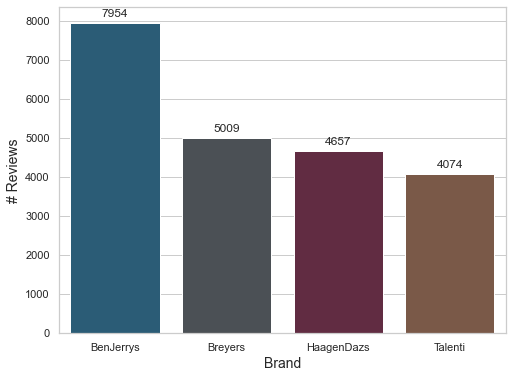

In [16]:
# plot the brands flavors counts

plt.figure(figsize=(8, 6))
colors = ratings_by_brand['brand'].replace(color_reference) # replace elements in a list using dictionary lookup
colors = colors.tolist() # list of colors for palette parameter in sns plot
splot = sns.barplot(data=ratings_by_brand, x='brand', y='rating_count', palette=colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Brand', size=14)
plt.ylabel('# Reviews', size=14)

Text(387.3550000000001, 0.5, '# Reviews')

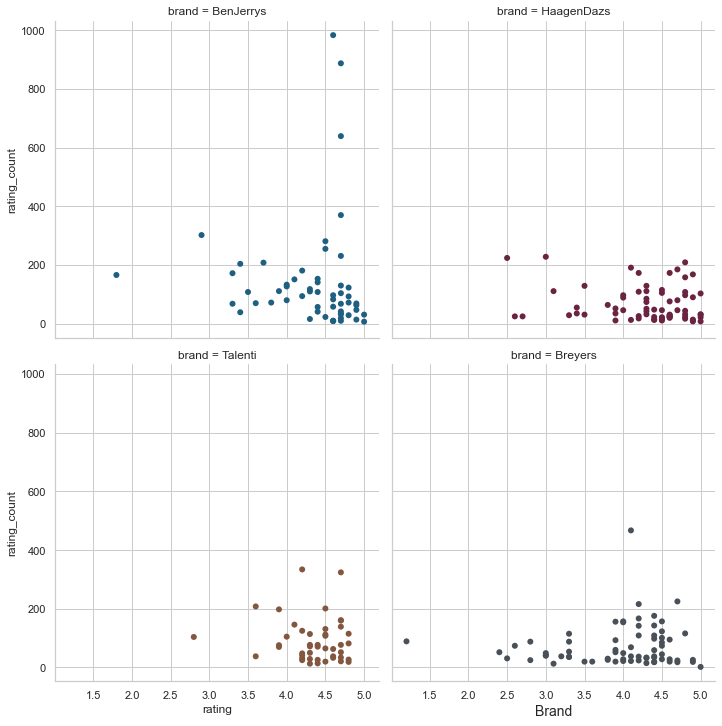

In [17]:
# scatter plot by brand
sns.relplot(data=df,
                x='rating', y='rating_count',
                hue='brand',
                col='brand',
                palette=my_colors,
                sizes=(1, 6), linewidth=0, col_wrap=2, legend=False
                )
plt.xlabel('Brand', size=14)
plt.ylabel('# Reviews', size=14)

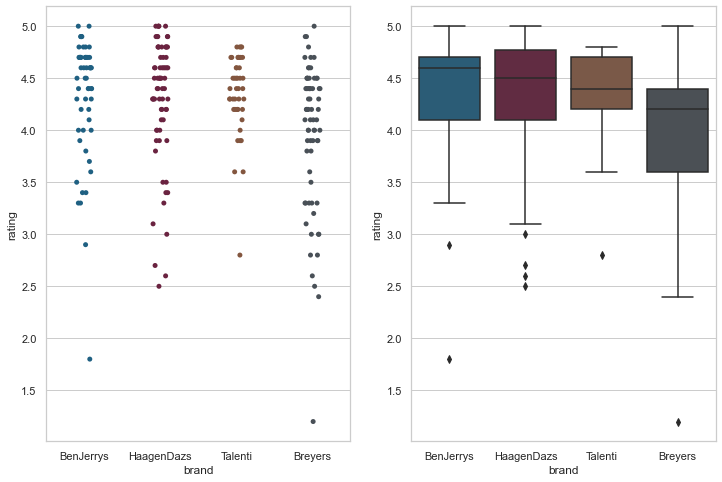

In [18]:
# scatter plot by brand
_, axs = plt.subplots(nrows=1, ncols=2) # making a subplot with 1 row and 2 columns
sns.stripplot(data=df, x='brand', y='rating', palette=my_colors, ax=axs[0])
sns.boxplot(data=df, x='brand', y='rating', palette=my_colors, ax=axs[1])

In [19]:
# Data Summary and Comments

"""



"""


'\n\n\n\n'

* Top 10 Worst Ice Creams

In [20]:
df.sort_values(by='rating', ascending=True).head(5)

,brand,name,rating,rating_count,ingredients
221,Breyers,Chocolate Chip Cookie Dough,1.2,89,"MILK, SUGAR, CORN SYRUP, CREAM, ENRICHED WHEAT..."
50,BenJerrys,Chocolate Chip Cookie Dough Core,1.8,166,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
223,Breyers,Coffee,2.4,52,"MILK, CORN SYRUP, SUGAR, CREAM, COFFEE EXTRACT..."
238,Breyers,Layered Dessert S'mores,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
123,HaagenDazs,Vanilla Milk Chocolate Almond Ice Cream Bar,2.5,224,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, MILK CHOCO..."


* Top Ice Cream for each brand

In [21]:
# Top 10 Ben & Jerry's Ice Cream
top10_bj = df[df['brand'] == 'BenJerrys'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_bj

,brand,name,rating,rating_count,ingredients
29,BenJerrys,Ice Cream Sammie,5.0,31,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
7,BenJerrys,Chocolate Peanut Butter Split,5.0,7,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
36,BenJerrys,Peanut Butter World®,4.9,69,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
33,BenJerrys,New York Super Fudge Chunk®,4.9,63,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
23,BenJerrys,Coffee Coffee BuzzBuzzBuzz!®,4.9,47,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
5,BenJerrys,Peanut Butter Half Baked®,4.9,14,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
51,BenJerrys,Sweet Like Sugar Cookie Dough Core,4.8,123,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
37,BenJerrys,Phish Food®,4.8,93,"CREAM, WATER, SKIM MILK, LIQUID SUGAR (SUGAR, ..."
19,BenJerrys,Chocolate Therapy®,4.8,72,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
48,BenJerrys,Vanilla Caramel Fudge,4.8,29,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."


In [22]:
# Top 10 Haagen Dazs Ice Cream
top10_hd = df[df['brand'] == 'HaagenDazs'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_hd

,brand,name,rating,rating_count,ingredients
88,HaagenDazs,Honey Salted Caramel Almond Ice Cream,5.0,103,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
120,HaagenDazs,Vanilla Caramel White Chocolate TRIO CRISPY LA...,5.0,32,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
100,HaagenDazs,Peppermint Bark Ice Cream,5.0,31,"WHITE CHOCOLATE ICE CREAM (CREAM, SKIM MILK, S..."
71,HaagenDazs,Chocolate Fudge Non-Dairy Bar,5.0,22,"WATER, SUGAR, CORN SYRUP, CHOCOLATE, COCONUT O..."
101,HaagenDazs,Peppermint Bark Ice Cream Bar,5.0,8,"WHITE CHOCOLATE ICE CREAM: CREAM, SKIM MILK, S..."
57,HaagenDazs,White Chocolate Raspberry Truffle Ice Cream,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT..."
66,HaagenDazs,Chocolate Ice Cream,4.9,90,"CREAM, SKIM MILK, CANE SUGAR, COCOA PROCESSED ..."
89,HaagenDazs,Irish Cream Cookie Squares,4.9,14,"CREAM, SKIM MILK, SUGAR, CORN SYRUP, EGG YOLKS..."
75,HaagenDazs,Coconut Caramel Non-Dairy,4.9,11,"COCONUT CREAM (COCONUT EXTRACT, WATER), CORN S..."
62,HaagenDazs,Caramel Soft Dipped Ice Cream Bar,4.9,8,"CARAMEL ICE CREAM: CREAM, SKIM MILK, SUGAR, EG..."


In [23]:
# Top 10 Talenti Ice Cream
top10_talenti = df[df['brand'] == 'Talenti'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_talenti

,brand,name,rating,rating_count,ingredients
132,Talenti,CARAMEL APPLE PIE GELATO,4.8,115,"MILK, SUGAR, CREAM, DEXTROSE, SKIM MILK, WHEAT..."
138,Talenti,COCONUT ALMOND CHOCOLATE GELATO,4.8,82,"MILK, SUGAR, CREAM, CHOCOLATE (PROCESSED WITH ..."
129,Talenti,BELGIAN CHOCOLATE GELATO,4.8,27,"MILK, SUGAR, CREAM, EGG AND EGG YOLK, DEXTROSE..."
157,Talenti,ORGANIC OAK-AGED VANILLA GELATO,4.8,19,"INGREDIENTS: ORGANIC SKIM MILK, ORGANIC CREAM,..."
151,Talenti,MEDITERRANEAN MINT GELATO,4.7,324,"MILK, SUGAR, CREAM, CHOCOLATE, DEXTROSE, MILK ..."
164,Talenti,ROMAN RASPBERRY SORBETTO,4.7,161,"RASPBERRIES, WATER, SUGAR, DEXTROSE, LEMON JUI..."
165,Talenti,SALTED CARAMEL TRUFFLE,4.7,160,"MILK, SUGAR, SKIM MILK, CREAM, WATER, COCONUT ..."
127,Talenti,ALPHONSO MANGO SORBETTO,4.7,139,"MANGOS, WATER, SUGAR, DEXTROSE, LEMON JUICE, C..."
159,Talenti,PEANUT BUTTER FUDGE SORBETTO,4.7,77,"WATER, PEANUTS, SUGAR, DEXTROSE, SALT, COCOA P..."
152,Talenti,MINT FUDGE COOKIE,4.7,52,"MILK, SUGAR, CREAM, COCONUT OIL, WHEAT FLOUR, ..."


In [24]:
# Top 10 Breyers Ice Cream
top10_breyers = df[df['brand'] == 'Breyers'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_breyers

,brand,name,rating,rating_count,ingredients
213,Breyers,OREO® Snack Cups 10ct,5.0,2,"SKIM MILK, LIQUID SUGAR, SUGAR, WATER, CREAM, ..."
235,Breyers,Chocolate Snack Cups 10ct,4.9,26,"MILK, CREAM, SUGAR, WATER, DUTCHED COCOA (PROC..."
202,Breyers,No Sugar Added Caramel Swirl,4.9,19,"MILK, MALTITOL SYRUP, MALTODEXTRIN (CORN), CRE..."
198,Breyers,Non-Dairy Vanilla Peanut Butter,4.8,116,"ALMOND MILK, WATER, ALMONDS, LIQUID SUGAR, SUG..."
175,Breyers,Chocolate,4.7,225,"MILK, CREAM, SUGAR, DUTCHED COCOA (PROCESSED W..."
196,Breyers,Lactose Free Chocolate,4.7,24,"SKIM MILK, SUGAR, CORN SYRUP, CREAM, DUTCHED C..."
237,Breyers,CarbSmart™ Caramel Swirl Bar,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
224,Breyers,Vanilla Chocolate,4.6,95,"MILK, CREAM, SUGAR, WHEY, DUTCHED COCOA (PROCE..."
233,Breyers,Natural Vanilla Snack Cups 10ct,4.6,28,"MILK, CREAM, SUGAR, WATER, VEGETABLE GUM (TARA..."
212,Breyers,CarbSmart™ Mint Fudge Bar,4.6,20,"MILK, WATER, FUDGE SWIRL, CORN SYRUP, HIGH FRU..."


# Getting Unique List of All Ingredients

* Data Cleaning

In [25]:
# increasing column character limit for better visualization
pd.set_option('display.max_colwidth', 50000)

In [26]:
# eliminating content inside parentheses ()
df['ingredients_cleaned'] = df['ingredients'].str.lower()
df['ingredients_cleaned'].head()

0                                   cream, skim milk, liquid sugar (sugar, water), water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter (cream, salt), butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder (sodium acid pyrophosphate, sodium bicarbonate, corn starch, monocalcium phosphate), baking soda, salt, carrageenan, lactase
1                                                                          cream, skim milk, liquid sugar (sugar, water), water, sugar, peanuts, wheat flour, canola oil, egg yolks, corn starch, peanut oil, cocoa powder, salt, soybean oil, invert cane sugar, milk fat, eggs, egg whites, guar gum, soy lecithin, tapioca starch, baking soda, carrageenan, vanilla extract, barley malt, malted barley flour
2    cream, liquid sugar (sugar, water), skim milk, water, sugar, cocoa (processed with alkali), potato, coconut oil, corn syrup solids, soybean oil, egg yolks, rice starch, sunflower oil, barley 

In [27]:
# generate all unique ingredients
all_ingredients = set()

for row in df.iterrows():
    ingredients = df.loc[row[0], 'ingredients_cleaned']
    for ingredient in ingredients.split(','):
        if ingredient not in all_ingredients:
            all_ingredients.add(ingredient)

# iterrows(): returns a tuple containing the index and the rest of the row

In [28]:
all_ingredients

# we can se all the problems with the description ingredients (that subingredients of an ingredient)

# 1) parentheses capture all the content inside parentheses
# 2) AND and OR
# 3) special character

{'  water',
 ' acesulfame potassium',
 ' almond extract',
 ' almonds',
 ' almonds roasted in vegetable oil',
 ' and/or baking soda',
 ' and/or calcium phosphate',
 ' and/or canola oil',
 ' and/or palm oil',
 ' and/or sunflower oil)',
 ' anhydrous milkfat',
 ' annatto (color)',
 ' annatto (for color)',
 ' apple juice',
 ' artificial color',
 ' artificial flavor',
 ' artificial flavoring',
 ' artificial flavors',
 ' ascorbic acid',
 ' baking powder',
 ' baking powder (sodium acid pyrophosphate',
 ' baking soda',
 ' baking soda and/or calcium phosphate',
 ' baking soda. contains milk',
 ' balsamic vinegar (red wine vinegar',
 ' banana puree',
 ' bananas',
 ' barley malt',
 ' beet juice (for color)',
 ' belgian chocolate',
 ' black carrot concentrate (for color)',
 ' black cherries',
 ' black raspberries',
 ' black raspberry puree',
 ' blackberry juice concentrate',
 ' bleached wheat flour',
 ' blue 1',
 ' blue 1 lake',
 ' blue 2',
 ' blue 2 lake',
 ' blueberries',
 ' blueberry puree conce

In [29]:
# importing regex module
import re

In [30]:
# eliminating content inside parentheses '()'
df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(r'\([^()]*\)',"", regex=True)
df['ingredients_cleaned'].head() # checking

0                                                                                                            cream, skim milk, liquid sugar , water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter , butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder , baking soda, salt, carrageenan, lactase
1                                                   cream, skim milk, liquid sugar , water, sugar, peanuts, wheat flour, canola oil, egg yolks, corn starch, peanut oil, cocoa powder, salt, soybean oil, invert cane sugar, milk fat, eggs, egg whites, guar gum, soy lecithin, tapioca starch, baking soda, carrageenan, vanilla extract, barley malt, malted barley flour
2    cream, liquid sugar , skim milk, water, sugar, cocoa , potato, coconut oil, corn syrup solids, soybean oil, egg yolks, rice starch, sunflower oil, barley malt, cocoa powder, wheat flour, milk, salt, soy lecithin, yeast extract, natural flavor, guar gum, sea salt, m

In [31]:
# this function for spliting text: corrects and process text
def ingredients_processing(text):
    bool = df['ingredients_cleaned'].str.contains(text, regex=False)
    val_to_replace = df['ingredients_cleaned'][bool].str.split(text).str[0]
    df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)
    return

In [32]:
# problematic text: spliting by and selecting only first column

problematic_text_ingredients_list = ['\ncontains', 'contains', '.']

for text in problematic_text_ingredients_list:
    ingredients_processing(text)

In [33]:
#checking results

df['ingredients_cleaned']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       cream, skim milk, liquid sugar , water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter , butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder , baking soda, salt, carrageenan, lactase
1                                                                                               

In [34]:
# Observations with ':' 
# These observations strongly indicates that ice cream have additional items (coating, caramel/fudge, chocolate chips, chocolate drizzle, peanut butter, etc)

# 1) First, I'm going to create a column that checks for existing additional items. Then, if necessary, I will manually make corrections.
# 2) Secondl, because the first ':' indicates the first item (ice cream) ingredients, i'll split that row and select second column ("ice cream: milk, ...")

In [35]:
# checking ice creams flavors that have additional items
bool = df['ingredients_cleaned'].str.contains(":", regex=False)
df['have_additional_items'] = bool*1 #convert boolean to 0-1

In [36]:
# checking inconsistencies

df[df['have_additional_items']== 1]

,brand,name,rating,rating_count,ingredients,ingredients_cleaned,have_additional_items
62,HaagenDazs,Caramel Soft Dipped Ice Cream Bar,4.9,8,"CARAMEL ICE CREAM: CREAM, SKIM MILK, SUGAR, EGG YOLKS, SWEETENED CONDENSED MILK (CONDENSED MILK SUGAR), CORN SYRUP, SALT, PECTIN, BAKING SODA, VANILLA EXTRACT. CHOCOLATY COATING: SUGAR, COCOA PROCESSED WITH ALKALI, CANOLA OIL, PALM OIL, MILKFAT, SOY LECITHIN. SALTED CARAMEL SWIRL: CORN SYRUP, SWEETENED CONDENSED MILK (CONDENSED MILK SUGAR), CREAM, SUGAR, WATER, BUTTER (CREAM, SALT), SALT, PECTIN, MILKFAT, SOY LECITHIN.\nCONTAINS: MILK, EGG AND SOY INGREDIENTS","caramel ice cream: cream, skim milk, sugar, egg yolks, sweetened condensed milk , corn syrup, salt, pectin, baking soda, vanilla extract",1
67,HaagenDazs,Chocolate Soft Dipped Ice Cream Bar,2.6,25,"CHOCOLATE ICE CREAM: CREAM, SKIM MILK, SUGAR, COCOA PROCESSED WITH ALKALI, EGG YOLKS. CHOCOLATY COATING: SUGAR, COCOA PROCESSED WITH ALKALI, CANOLA OIL, PALM OIL, SOY LECITHIN.\nCONTAINS: MILK, EGG AND SOY INGREDIENTS","chocolate ice cream: cream, skim milk, sugar, cocoa processed with alkali, egg yolks",1
84,HaagenDazs,Double Belgian Chocolate Chip Ice Cream,4.8,158,"CHOCOLATE ICE CREAM: CREAM, SKIM MILK, DARK CHOCOLATE (BELGIAN CHOCOLATE, SUGAR, COCOA BUTTER, SOY LECITHIN, VANILLA), SUGAR, EGG YOLKS, COCOA PROCESSED WITH ALKALI, VANILLA EXTRACT. CHOCOLATE CHUNKS WITH VEGETABLE OIL: BELGIAN CHOCOLATE (SUGAR, CHOCOLATE, COCOA BUTTER, SOY LECITHIN, NATURAL FLAVOR), COTTONSEED OIL, COCONUT OIL. CONTAINS: MILK, EGG AND SOY INGREDIENTS","chocolate ice cream: cream, skim milk, dark chocolate , sugar, egg yolks, cocoa processed with alkali, vanilla extract",1
85,HaagenDazs,Dulce de Leche Cookie Squares,3.9,35,"ULCE DE LECHE ICE CREAM: CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED MILK (MILK,SUGAR), EGG YOLKS, CORN SYRUP, BAKING SODA, SALT, VANILLA EXTRACT. MILK CHOCOLATE AND VEGETABLE OIL COATING: MILK CHOCOLATE (SUGAR, WHOLE MILK POWDER, CHOCOLATE, COCOA BUTTER, SOY LECITHIN, VANILLA EXTRACT), COCONUT OIL. CHOCOLATE COOKIE: BLEACHED WHEAT FLOUR, SUGAR, PALM OIL, COCOA PROCESSED WITH ALKALI, CORN SYRUP, MOLASSES, BAKING SODA, SALT, SOY LECITHIN. CARAMEL SWIRL: SWEETENED CONDENSED MILK (MILK, SUGAR), SUGAR, WATER, CORN SYRUP, COCONUT OIL, PECTIN, SOY LECITHIN, SALT, BAKING SODA, VANILLA EXTRACT. DARK CHOCOLATE DRIZZLE WITH VEGETABLE OIL: DARK CHOCOLATE (SUGAR, CHOCOLATE, SOY LECITHIN, VANILLA EXTRACT), COCONUT OIL, SOYBEAN OIL","ulce de leche ice cream: cream, skim milk, sugar, sweetened condensed milk , egg yolks, corn syrup, baking soda, salt, vanilla extract",1
99,HaagenDazs,Peanut Butter Chocolate Fudge Non-Dairy Bar,4.8,32,"PEANUT BUTTER FROZEN DESSERT: WATER, CORN SYRUP, SUGAR, PEANUTS, PEANUT OIL, COCONUT OIL, PECTIN, SALT. DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR, CHOCOLATE, SOY LECITHIN, VANILLA EXTRACT), COCONUT OIL, SOYBEAN OIL. SALTED FUDGE SWIRL: POWDERED CANE SUGAR (CANE SUGAR, CORN STARCH), SUNFLOWER OIL, COCOA, SALT, SUNFLOWER LECITHIN","peanut butter frozen dessert: water, corn syrup, sugar, peanuts, peanut oil, coconut oil, pectin, salt",1
101,HaagenDazs,Peppermint Bark Ice Cream Bar,5.0,8,"WHITE CHOCOLATE ICE CREAM: CREAM, SKIM MILK, SUGAR, CORN SYRUP, EGG YOLKS, NATURAL FLAVOR, COCOA BUTTER. DARK CHOCOLATE AND VEGETABLE OIL COATING WITH PEPPERMINT CANDY PIECES: DARK CHOCOLATE (SUGAR, CHOCOLATE, SOY LECITHIN, VANILLA EXTRACT), PEPPERMINT CANDY PIECES: (SUGAR, CORN SYRUP, COCONUT OIL, NATURAL FLAVOR, SOY LECITHIN), COCONUT OIL, SOYBEAN OIL","white chocolate ice cream: cream, skim milk, sugar, corn syrup, egg yolks, natural flavor, cocoa butter",1
103,HaagenDazs,Pistachio Ice Cream,3.8,64,"WEET CREAM ICE CREAM: CREAM, SKIM MILK, SUGAR, LACTOSE REDUCED SKIM MILK, CORN SYRUP, EGG YOLKS, SALT. ROASTED PISTACHIOS: PISTACHIOS, SAFFLOWER OIL","weet cream ice cream: cream, skim milk, sugar, lactose reduced skim milk, corn syrup, egg yolks, salt",1
117,HaagenDazs,Vanilla Soft Dipped Ice Cream Bar,4.4,13,"VANILLA I

In [37]:
# manual correction
# only row 157 (Talenti Organic Oak-Aged Vanilla Gelato) needs correction

df.loc[157, 'have_additional_items'] = False

In [38]:
# observations with ':' problem - spliting by and selecting only second column

bool = df['ingredients_cleaned'].str.contains(":", regex=False)
val_to_replace = df['ingredients_cleaned'][bool].str.split(": ").str[1] # here we will use the second column, not the first
df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)

In [39]:
df['ingredients_cleaned']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       cream, skim milk, liquid sugar , water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter , butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder , baking soda, salt, carrageenan, lactase
1                                                                                               

* Data Treatment: Manual Correction

In [40]:
# treating the problem with 'mono and diglycerides'

df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace("mono and diglycerides", "monoglycerides, diglycerides", regex=False)

In [41]:
# treating the problem with 'and/or' + 'and':
unwanted_text = [' and ', 'and/or']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, ',', regex=False)

In [42]:
# replacing strange text to ''

unwanted_text = ['†', ')' , 'organic', 'pasteurized','(sugar', 'unbleached', 'enriched', 'unenriched', 'vanilla ice cream', 'coffee ice cream', 'white chocolate ice cream', 
'unsweetened', 'whole', 'pieces', 'concentrates', 'concentrate', 'juice', 'pasteurized', 'puree',  'vegetables', ' lake']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, '', regex=False)

In [43]:
# replacing strange text to ' '

unwanted_text = ['*', '/']

for word in unwanted_text:
    df['ingredients_cleaned'] = df['ingredients_cleaned'].str.replace(word, ' ', regex=False)

In [44]:
# Word Correcting

# Ok. I'm feeling very dumb for doing this checking mannually. 
# I could use PorterStemmer, which is based on suffixes in the English language. But after some tests, i'm not feeling very confident to use that

# PorterStemmer()
# stem function()
# takes all words and break them down to their root. This reduces significantly duplicated words (ex: egg x eggs)

# Creating a dictionary
word_correcting = {"reese's mini ": "reese's peanut butter", "reese's peanut butter cup ": "reese's peanut butter", "reese's peanut butter cups": "reese's peanut butter", "reese's peanut butter sauce": "reese's peanut butter", "reese's peanut butter swirl": "reese's peanut butter", 'almonds roasted in vegetable oil': 'almonds', 'roasted almonds': 'almonds', 'dried apples': 'apple', 'apples': 'apple', 'artificial color lake': 'artificial color', 'color added': 'artificial color', 'annatto': 'artificial color', 'blue 1': 'artificial color', 'blue 1': 'artificial color', 'blue 1 lake': 'artificial color', 'blue 2': 'artificial color', 'blue 2 lake': 'artificial color', 'yellow 5': 'artificial color', 'yellow 5 lake': 'artificial color', 'yellow 6': 'artificial color', 'yellow 6 lake': 'artificial color', 'red 40': 'artificial color', 'red 40 lake': 'artificial color', 'reb a': 'artificial color', 'artificial color lake': 'artificial color', 'artificial flavoring': 'artificial flavor', 'artificial flavors': 'artificial flavor', 'banana puree': 'banana', 'bananas': 'banana', 'black carrot s': 'black carrot', 'black raspberry puree': 'black raspberry', 'black raspberries': 'black raspberry', 'blueberries': 'blueberry', 'butteroil': 'butter', 'butterfat': 'butter', 'butter oil': 'butter', 'dried cane syrup': 'cane syrup', 'caramelized sugar': 'caramel', 'caramel color': 'caramel', 'caramel flavor': 'caramel', 'caramel swirl': 'caramel', 'caramel syrup': 'caramel', 'caramelized sugar syrup': 'caramelized sugar', 'carob bean': 'carob bean gum', 'carob gum': 'carob bean gum', 'cheese culture': 'cheese cultures', 'cherries': 'cherry', 'cherry': 'cherry', 'cherry puree': 'cherry', 'cherry concentrate': 'cherry', 'cherry juice concentrate': 'cherry', 'chocolate chip cookies': 'chocolate', 'chocolate chips': 'chocolate', 'chocolate cookie pieces': 'chocolate', 'chocolate flavored coating': 'chocolate', 'chocolate liquor': 'chocolate', 'chocolate processed with alkali': 'chocolate', 'chocolatey chips': 'chocolate', 'milk chocolate candies': 'chocolate', 'milk chocolate': 'chocolate', 'dark chocolate': 'chocolate', 'semi-sweet chocolate chunks': 'chocolate', 'chocolaty coated cone': 'chocolatey coated cone', 'black cocoa processed with alkali': 'cocoa processed with alkali', 'coconut concentrate': 'coconut', 'coconut cream': 'coconut', 'coconut extract': 'coconut', 'desiccated coconut': 'coconut', 'coffee extract': 'coffee', 'coffee extract concentrate': 'coffee', 'condensed skim milk': 'condensed milk', 'evaporated milk': 'condensed milk', 'sweetened condensed milk': 'condensed milk', 'sweetened condensed skim milk': 'condensed milk', 'corn syrup solids': 'corn syrup', 'high fructose corn syrup': 'corn syrup', 'corn starch': 'cornstarch', 'modified corn starch': 'cornstarch', 'modified cornstarch': 'cornstarch', 'modified food starch': 'cornstarch', 'modified cornstarch': 'cornstarch', 'eggs': 'egg', 'whole egg': 'egg', 'whole eggs': 'egg', 'egg whites': 'egg white', 'egg yolks': 'egg yolk', 'guar': 'guar gum', 'ground heath toffee': 'heath toffee bar', 'hibiscus flower': 'hibiscus', 'hibiscus powder': 'hibiscus', 'invert cane sugar': 'inverted sugar syrup', 'invert sugar': 'inverted sugar syrup', 'lactase enzyme': 'lactase', 'lemon juice': 'lemon', 'lemon juice concentrate': 'lemon', 'locust bean': 'locust bean gum', 'dry malt extract': 'malt extract', 'maltitol': 'maltitol syrup', 'corn maltodextrin': 'maltodextrin', 'mango puree': 'mango', 'mangos': 'mango', 'organic milk': 'milk', 'anhydrous milkfat': 'milk fat', 'milkfat': 'milk fat', 'nonfat milk solids': 'milk powder', 'nonfat dry milk': 'milk powder', 'whole milk powder': 'milk powder', 'skim milk powder': 'milk powder', 'natural flavors': 'natural flavor', 'rolled oats': 'oats', 'vitamin a palm oil oilitate': 'palm oil', '^palm$': 'palm oil', 'palm kernel': 'palm oil', 'palm kernel oil': 'palm oil', 'partially defatted peanut flour': 'peanut', 'roasted peanuts': 'peanuts', 'peppermint bark': 'peppermint', 'peppermint extract': 'peppermint', 'peppermint oil': 'peppermint', 'peppermint twists candy': 'peppermint', 'pistachio paste': 'pistachio', 'pistachios': 'pistachio', 'raspberries': 'raspberry', 'raspberry swirl': 'raspberry', 'sea salt': 'salt', 'organic skim milk': 'skim milk', 'lactose reduced skim milk': 'skim milk', 'nonfat milk': 'skim milk', 'soy lecithin': 'soybean lecithin', 'soybean lecithin natural flavor': 'soybean lecithin', 'soy lecithin natural flavor': 'soybean lecithin', 'soybean oils': 'soybean oil', 'expeller pressed soybean oil': 'soybean oil', 'spice': 'spices', 'strawberries': 'strawberry', 'strawberry swirl': 'strawberry', 'powdered sugar': 'sugar', 'cane sugar': 'sugar', 'liquid sugar': 'sugar syrup', 'sunflower oils': 'sunflower oil', 'tapioca flour': 'tapioca', 'tapioca starch': 'tapioca', 'tapioca syrup': 'tapioca', 'tara': 'tara gum', 'thiamin mononitrate': 'thiamine mononitrate', 'vanilla bean seeds': 'vanilla', 'vanilla beans': 'vanilla', 'vanilla extract': 'vanilla', 'ground vanilla': 'vanilla', 'processed vanilla': 'vanilla', 'vegetable gums': 'vegetable gum', 'waffle cone': 'waffle cone pieces', 'un wheat flour': 'wheat flour', 'bleached wheat flour': 'wheat flour', 'whey protein concentrate': 'whey', 'milk protein concentrate': 'whey', 'whey protein': 'whey', 'heavy cream': 'cream'
}

# Substituing values
df['ingredients_cleaned'] = df['ingredients_cleaned'].replace(word_correcting, regex=True)

In [45]:
# generate all unique ingredients
all_ingredients = set()

for row in df.iterrows():
    ingredients = df.loc[row[0], 'ingredients_cleaned']
    ingredients = ingredients.replace(' , ', ', ') # trim excess of whitespace
    ingredients = ingredients.replace('  ', ' ') # trim excess of whitespace
    ingredients = ingredients.replace(',,', ', ') # trim excess of comma
    df.loc[row[0], 'ingredients_cleaned'] = ingredients
    for ingredient in ingredients.split(','):
            if ingredient not in all_ingredients:
                ingredient = re.sub(r"^ +| +$", "", ingredient) # trim leading and trailing whitespace
                all_ingredients.add(ingredient)

all_ingredients.remove('')

In [46]:
all_ingredients

{'acesulfame potassium',
 'almond extract',
 'almond milk',
 'almonds',
 'apple',
 'artificial color',
 'artificial flavor',
 'ascorbic acid',
 'baking powder',
 'baking soda',
 'balsamic vinegar',
 'banana',
 'barley malt',
 'beet',
 'belgian chocolate',
 'black carrot',
 'black cherry',
 'black raspberry',
 'blackberry',
 'blueberry',
 'bourbon',
 'brown sugar',
 'butter',
 'calcium carbonate',
 'calcium phosphate',
 'cane syrup',
 'canola oil',
 'caramel',
 'caramel syrup',
 'carnauba wax',
 'carob bean gum',
 'carob bean gum gum',
 'carrageenan',
 'carrot',
 'carrot powder',
 'cellulose gum',
 'cheese cultures',
 'cheese culturess',
 'cheesecake base',
 'cheesecake with graham crust',
 'cherry',
 'chocolate',
 'chocolate cookie',
 'chocolatey coated cone',
 'chocolatey coated peanuts',
 'cinnamon',
 'citric acid',
 'cloves',
 'cocoa',
 'cocoa butter',
 'cocoa powder',
 'cocoa processed with alkali',
 'coconut',
 'coconut oil',
 'coffee',
 'condensed milk',
 'cone',
 "confectioner's

In [47]:
/// 

SyntaxError: invalid syntax (<ipython-input-47-58cb39ba1d09>, line 1)

In [51]:
# splitting
all_ingredients_dataframe = pd.DataFrame(all_ingredients).transpose() # transposing for get columns
test = all_ingredients_dataframe

for col in all_ingredients_dataframe:
    col_name = all_ingredients_dataframe[col][0] # col_name: the name of future dummy column that we will check for contain that word in ice cream's ingredient list
    for row in df['ingredients_cleaned']:   # each row is a ice cream ingredients
        words = pd.Series(row.split(', ')) # words = all ingredients in a determined ice cream // I preferred to use split instead regex because of compound words
        for word in words:
            bool = words.str.contains(col_name, regex=False) #checks if the column name (ingredient) are contained in the ice cream's ingredient list 
            test[row, col_name] = (bool*1).sum()
#df['ingredients_cleaned'][test].head()
#for col in all_ingredients_dataframe:
#    test = df['ingredients_cleaned'].str.contains(str(col))
#    print(test)

test

KeyboardInterrupt: 

In [54]:
test

,0,1,2,3,4,5,6,7,8,9,...,"(milk, strawberry, cream, sugar, whey, vegetable gum , tara gum)","(milk, cream, sugar, coconut oil, whey, dutched cocoa, vegetable gum, natural flavor, soybean lecithin, tara gum)","(milk, cream, sugar, strawberry, whey, dutched cocoa, vegetable gum, tara gum, carob bean gum, natural flavor, tara gum)","(skim milk, soluble corn fiber, erythritol, milk protein, dutched cocoa, cream, sugar, vegetable gum, guar gum, carob bean gum, artificial color, vitamin a palmitate, tara gum)","(skim milk, soluble corn fiber, erythritol, chocolate, maltitol syrup, chocolate, cocoa butter, soybean lecithin, vanilla, milk, milk protein, cream, sugar, vegetable gum, guar gum, carob bean gum, artificial color, natural flavor, vitamin a palmitate, tara gum)","(skim milk, soluble corn fiber, erythritol, milk protein, sugar, cream, wheat flour, palm,palm oil oil, palm oil, palm oil oil, dutched cocoa, vegetable gum, guar gum, carob bean gum, natural flavor, salt, sodium bicarbonate, soybean lecithin, artificial color, vitamin a palmitate, tara gum)","(skim milk, soluble corn fiber, erythritol, milk protein, cream, sugar, vegetable gum, guar gum, carob bean gum, natural flavor, artificial color, vitamin a palmitate, tara gum)","(milk, cream, sugar, corn syrup, egg yolk, whey, vegetable gum, carob bean gum, tara gum, guar gum, monoglycerides, diglycerides, natural flavor, artificial color, salt, tara gum)","(milk, water, maltitol syrup syrup, cream, polydextrose, glycerin, coconut oil, whey, soluble corn fiber, vegetable gum, guar gum, carob bean gum, monoglycerides, diglycerides, natural flavor, acesulfame potassium, sucralose, tara gum)","(skim milk, sugar, corn syrup, cream, whey, vegetable gum, carob bean gum, guar gum, tara gum gum, monoglycerides, diglycerides, natural flavor, lactase, vitamin a palmitate, tara gum)"
0,honey,pecans,matcha green tea,tara gum,maltitol syrup syrup,caramel,lecithin,wheat bran,vanilla,cane syrup,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
print(df['ingredients_cleaned'][:5])

# Getting Dummy Matrix

HERE:
1) UNDROP COLUMNS: 'ingredients', 'ingredients_cleaned'

In [ ]:
y = df.loc[:, 'rating']
X = df.drop(['rating','ingredients','name'], axis=1)
df_bckp = df.copy()

In [ ]:
def dummy(df, column, prefix):
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
X = dummy(X, 'brand', 'b')

In [ ]:
X = dummy(X, 'ingredients_cleaned', 'ing')

In [ ]:
X

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
mlb = MultiLabelBinarizer()

ingredients_df = pd.DataFrame(mlb.fit_transform(ingredients_df), columns=mlb.classes_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=50)
#arrumar aqui pra baixo, testando

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train.head()

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_train)
print(f"predicted response:\n{y_pred}")

In [ ]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

In [ ]:
model.score(X_test, y_test)

In [ ]:
#plt.scatter(X_train, y_train,color='g')
plt.plot(X_train, y_pred,color='k') 
plt.show()

## Chi Squared Feature Selection

In [ ]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

* Ingredients with Order

In [ ]:
for col in new_ingredients.columns:
    new_ingredients[col] = new_ingredients[col] + " " + str((col + 1))
new_ingredients.head()

In [ ]:
new_ingredients = new_ingredients.stack().value_counts().reset_index()

# stack: reshapa o df de forma que cada observação tenha um em index "interno"
# value_counts: contagem de vezes em que o ingrediente aparece
# reset_index: cria uma nova linha e coluna com os índices (a ideia é usar para inserir nome para as colunas)

In [ ]:
new_ingredients.columns = ['Word', 'Frequency']
new_ingredients

In [ ]:
# checks for unique values for check any problem

In [ ]:
# https://www.fda.gov/food/food-ingredients-packaging/overview-food-ingredients-additives-colors

## Deprecated

In [ ]:
# showing the problem with "contains:" and "\ncontains:"
bool = df['ingredients_cleaned'].str.contains('\ncontains', regex=False)
df['ingredients_cleaned'][bool == True] # checking

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
# eliminating content after '\ncontains'
val_to_replace = df['ingredients_cleaned'][df['ingredients_cleaned'].str.contains(":", regex=False) == True].str.split('\ncontains').str[0]
df['ingredients_cleaned'] = df['ingredients_cleaned'].mask(bool, val_to_replace)

In [ ]:
df['ingredients_cleaned'][117]

In [ ]:
"""# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["bj", "breyers", "hd", "talenti"]
sns.scatterplot(x="rating", y="rating_count",
                hue="rating",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)"""

In [ ]:
"""f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["bj", "breyers", "hd", "talenti"]
sns.scatterplot(data=df,
                x="rating", y="rating_count",
                hue="brand",
                style="brand",
                sizes=(1, 8), linewidth=0
                )"""